<a href="https://colab.research.google.com/github/yeonmi02/deep-learning-practice/blob/main/easy_deep_learning_principle_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [79]:
from tensorflow.keras.models import Sequential # keras 라이브러리의 models class에서 Sequential 함수 불러오기
from tensorflow.keras.layers import Dense,Input # layer class에서 Dense 함수 불러오기
from keras.utils import plot_model
import numpy as np # 데이터 전처리를 위해 사용하는 라이브러리 불러오기

### 2. 데이터 준비

In [80]:
!git clone https://github.com/taehojo/data.git

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")

X = Data_set[:,0:16] # 행,열의 순서대로 입력하기 0-15까지
y = Data_set[:,16] # 행은 전체이고 열은 16번째만

fatal: destination path 'data' already exists and is not an empty directory.


In [81]:
import pandas as pd
df=pd.read_csv('./data/ThoraricSurgery3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [82]:
df.shape

(470, 17)

### 3. 구조 결정

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

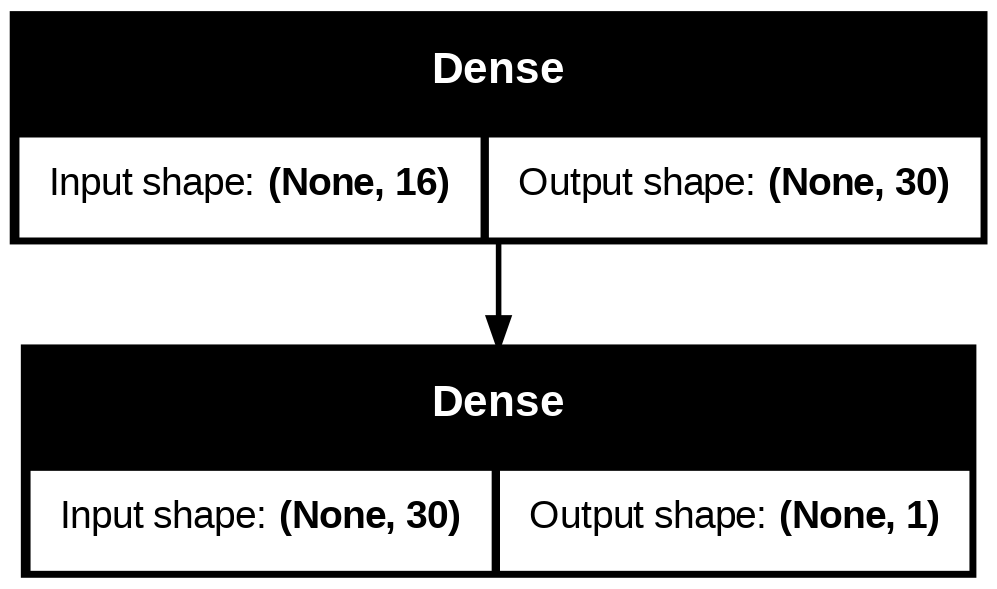

In [83]:
#model = Sequential([
 # Input(shape=(16,))
  #,Dense(30, activation='relu')
  #,Dense(1, activation= 'sigmoid')
#])

model = Sequential() #딥러닝 구조를 짜고 층 설정
model.add(Input(shape=(16,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary() #신경망 모델의 구조와 파라미터 정보를 보여줌
plot_model(model,show_shapes=True)

### 4. 모델 실행

In [84]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1562 - loss: 22.8856
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1569 - loss: 9.8399
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - loss: 0.6771
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8489 - loss: 0.5637
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8445 - loss: 0.4626


In [85]:
history.history

{'accuracy': [0.1489361673593521,
  0.15531915426254272,
  0.7893617153167725,
  0.8510638475418091,
  0.848936140537262],
 'loss': [20.035072326660156,
  7.102010726928711,
  0.6083295345306396,
  0.5207703113555908,
  0.4778861105442047]}

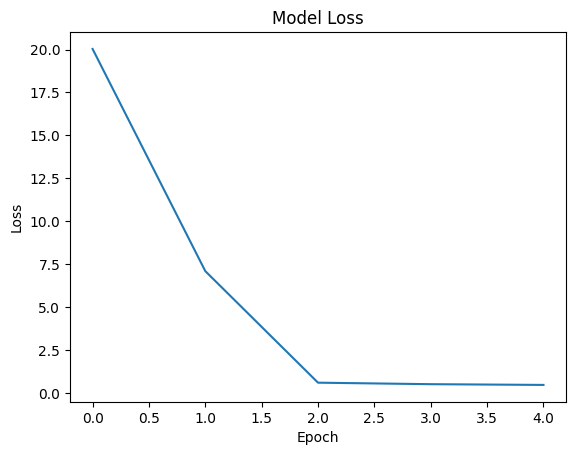

In [86]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [88]:
loss, accuracy = model.evaluate(X,y)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8313 - loss: 0.5155  
Test Loss: 0.4712
Test Accuracy: 0.8511


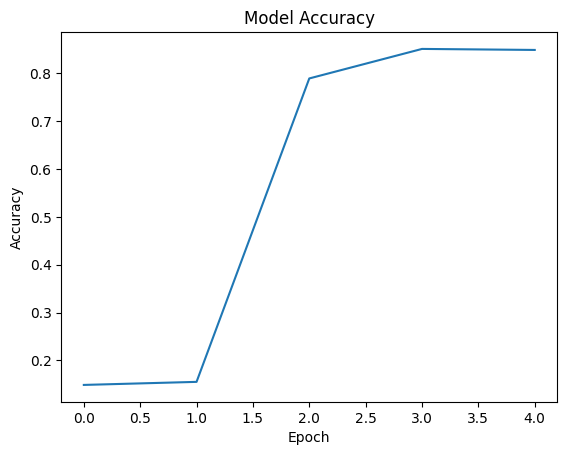

In [87]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

## 문제 1 : train,test 데이터 셋을 나누는 코드를 추가하고 다시 실행해보세요
 - 24번째 셀의 evaluate()의 파라미터 값도 추가한 변수 중 테스트 데이터 셋으로 변경

 ## 문제 2 : model2라는 변수에 아래 주건을 만족하는 모델을 저장하고 학습해서 결과를 비교해보세요

 - 입력층 동일
 - 은닉층1 : 64개의 뉴런,활성화함수 ReLU 사용
 - 은닉층2 : 32개의 뉴런,활성화함수 ReLU 사용
 - 출력층 동일

In [89]:
from sklearn.model_selection import train_test_split

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 훈련 세트로 훈련
history = model.fit(X_train, y_train, epochs=5, batch_size=16)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8865 - loss: 0.3991 
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.4243 
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8591 - loss: 0.4323 
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8310 - loss: 0.4964 
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8670 - loss: 0.4112 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7974 - loss: 0.6424
Test Loss: 0.6496
Test Accuracy: 0.7979


In [91]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7974 - loss: 0.6424
Test Loss: 0.6496
Test Accuracy: 0.7979


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

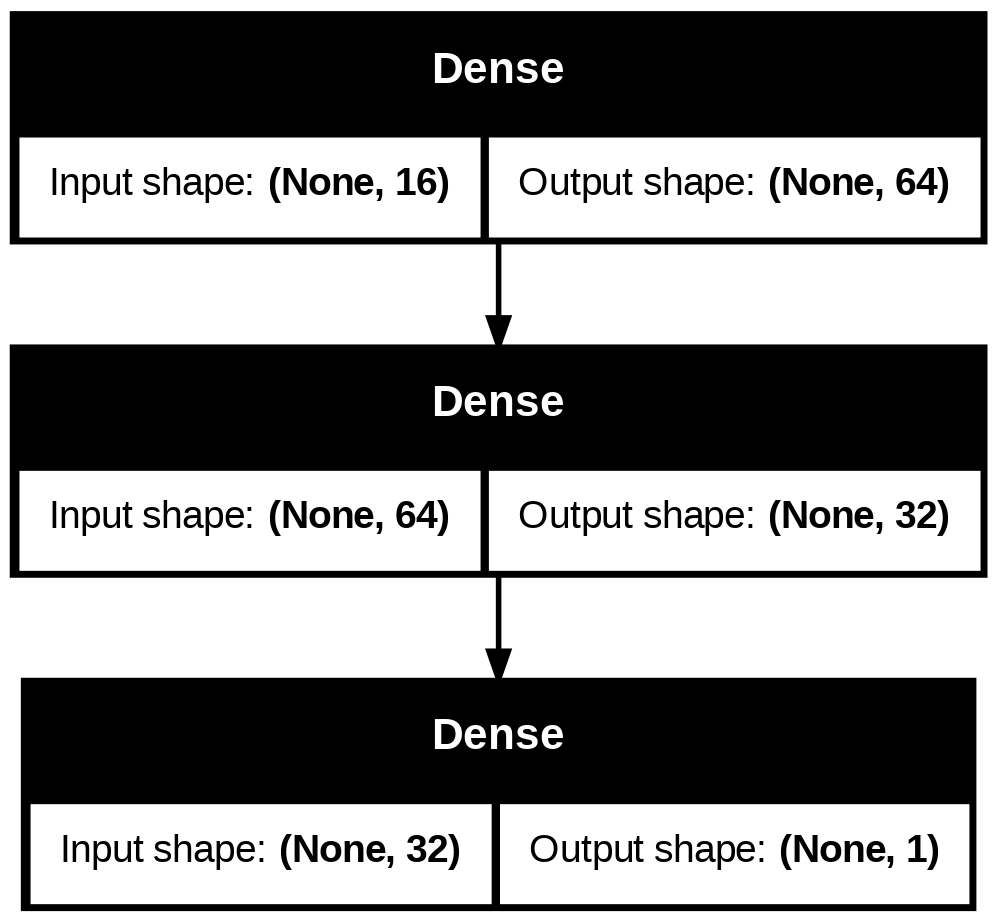

In [92]:
model2 = Sequential()
model2.add(Input(shape=(16,)))
model2.add(Dense(64, activation='relu'))  # 은닉층1: 64개 뉴런, ReLU 활성화 함수
model2.add(Dense(32, activation='relu'))  # 은닉층2: 32개 뉴런, ReLU 활성화 함수
model2.add(Dense(1, activation='sigmoid'))

model2.summary()
plot_model(model2,show_shapes=True)  # 모델 구조 출력